In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib nbagg

To use astrometry to solve field of an image:

Simple use:

    solve-field --overwrite o8010g0344o.1300829.ch.1992525.XY36.p00.fits 

Accelerated:

    solve-field --no-plots --guess-scale --overwrite o8010g0344o.1300829.ch.1992525.XY36.p00.fits
    
If an estimation of the field center is given:

    solve-field --no-plots --ra 354.456325 --dec -4.094019166 --radius 1 --guess-scale --overwrite o8010g0344o.1300829.ch.1992525.XY36.p00.fits
    
Where the center of the image can be extracted from the image header using the following python code:

    

    

## Load image

<IPython.core.display.Javascript object>


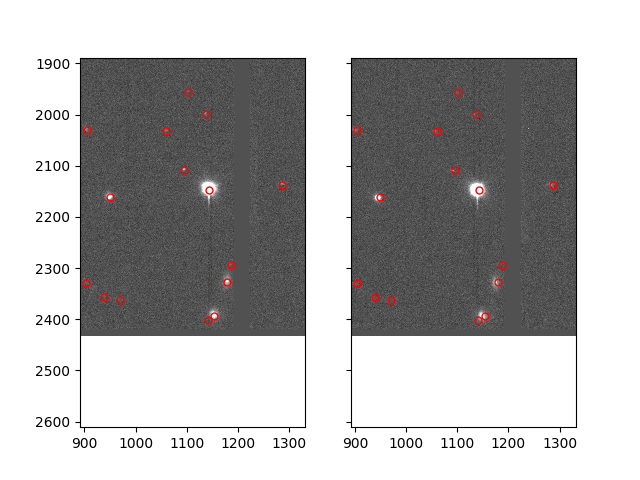

In [6]:
hdul_img=fits.open('set096/o8010g0344o.1300829.ch.1992525.XY36.p00.fits')
data_img=hdul_img[0].data
header=hdul_img[0].header
hdul_img.close()

hdul_img2=fits.open('set096/o8010g0362o.1300847.ch.1992543.XY36.p00.fits')
data_img2=hdul_img2[0].data
header2=hdul_img2[0].header
hdul_img2.close()

fig,axs=plt.subplots(1,2,sharey=True,sharex=True)
axs[0].imshow(data_img,cmap='gray',vmin=0,vmax=500)
axs[1].imshow(data_img2,cmap='gray',vmin=0,vmax=500)
ax=axs[0]

## Load sources detected

In [7]:
hdul_xy=fits.open('o8010g0344o.1300829.ch.1992525.XY36.p00.axy')
hdul_xy.info()
srcs=[]
for src in hdul_xy[1].data:
    srcs+=[[src[0],src[1]]]
srcs=np.array(srcs)
hdul_xy.close()

for ax in axs:
    ax.plot(srcs[:,0],srcs[:,1],'ro',mfc='None',ms=5)

Filename: o8010g0344o.1300829.ch.1992525.XY36.p00.axy
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  SOURCES       1 BinTableHDU     35   377R x 4C   [1E, 1E, 1E, 1E]   


## Load objects identified

In [5]:
hdul_objs=fits.open('o8010g0344o.1300829.ch.1992525.XY36.p00-indx.xyls')
hdul_objs.info()
objs=[]
for obj in hdul_objs[1].data:
    objs+=[[obj[0],obj[1]]]
objs=np.array(objs)
hdul_objs.close()

ax.plot(objs[:,0],objs[:,1],'gs',mfc='None',ms=7)

Filename: o8010g0344o.1300829.ch.1992525.XY36.p00-indx.xyls
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1                1 BinTableHDU     14   38R x 2C   [1D, 1D]   


## Coordinates

In [76]:
hdul_crd=fits.open('o8010g0344o.1300829.ch.1992525.XY36.p00.rdls')
hdul_crd.info()
crds=[]
for i,crd in enumerate(hdul_crd[1].data):
    crds+=["%.5f,%.5f"%(crd[0]/15,crd[1])]
crds=np.array(crds)
hdul_crd.close()

for i in range(len(crds)):
    t=ax.text(objs[i,0],objs[i,1],crds[i],color='b',fontsize=10,zorder=100,rotation=45,ha='left',va='bottom')

Filename: o8010g0344o.1300829.ch.1992525.XY36.p00.rdls
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     245   ()      
  1                1 BinTableHDU     16   38R x 2C   [1D, 1D]   


## Information about the image

In [93]:
header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2423 / length of data axis 1                          
NAXIS2  =                 2434 / length of data axis 2                          
BZERO   =               32768. / Scaling: TRUE = BZERO + BSCALE * DISK          
BSCALE  =                   1. / Scaling: TRUE = BZERO + BSCALE * DISK          
DATE-OBS= '2017-09-14T09:54:45.670299' /  UTC start of exposure                 
TIMESYS = 'UTC     '           / Time scale                                     
EQUINOX =                2000. /                                                
EXPTIME =                  45. /  exposure time (sec)                           
OBJCTRA = '23 37 49.518'       / RA of center of the image                      
OBJCTDEC= '-4 05 38.469'    

## Information about the match

In [2]:
ra=(23+37/60.0+49.518/3600.0)*15
dec=-(4+5/60.0+38.469/3600.0)
print(ra,dec)

354.456325 -4.0940191666666665


In [5]:
np.sign(-3)

-1

In [9]:
hdul_psf=fits.open("default.psf")

In [11]:
hdul_psf.info()

Filename: default.psf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  PSF_DATA      1 BinTableHDU     23   1R x 1C   [961E]   


In [13]:
hdul_psf[1].data

FITS_rec([ ([[[  2.40381883e-06,   7.60069597e-05,   8.54981554e-05,   7.54465946e-05,   8.13425067e-05,   8.50538563e-05,   7.86255987e-05,   3.32223935e-05,  -2.53305316e-05,  -2.43271165e-06,   1.11580441e-04,   1.85113196e-04,   1.11781279e-04,  -5.22066912e-05,  -1.48545674e-04,  -6.13458324e-05,   7.43288838e-05,   2.76304218e-05,  -1.35628201e-04,  -1.57351358e-04,  -5.41317095e-05,  -3.80859383e-05,  -8.01880524e-05,   1.93700293e-06,   1.28125030e-04,   9.64317587e-05,  -1.00769712e-05,  -3.07009032e-05,   2.51779438e-05,   7.89448313e-05,   1.31651745e-04], [  1.07151063e-04,   7.80015980e-05,   5.20944668e-05,   1.96801047e-05,   2.58915697e-05,   4.22252306e-05,   2.61278237e-05,   1.09607536e-05,   2.22668241e-05,   1.83793582e-05,   1.69202158e-05,   7.20969401e-05,   1.13053175e-04,   2.51594101e-05,  -6.95991839e-05,   4.80339113e-05,   2.57156673e-04,   2.34465711e-04,   3.90260866e-05,   3.77108845e-05,   1.98102425e-04,   1.63195917e-04,  -5.02058392e-05,  -9.1294881

In [14]:
hdul_cat=fits.open("sources.cat")
hdul_cat.info()

Filename: sources.cat
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   ()      
  1  OBJECTS       1 BinTableHDU     59   443R x 13C   [1J, 1E, 1E, 1D, 1E, 1D, 1D, 1D, 1D, 1D, 1E, 1E, 1E]   


In [18]:
hdul_cat[1].header

XTENSION= 'BINTABLE'           / THIS IS A BINARY TABLE (FROM THE LDACTOOLS)    
BITPIX  =                    8 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                   76 / BYTES PER ROW                                  
NAXIS2  =                  443 / NUMBER OF ROWS                                 
PCOUNT  =                    0 / RANDOM PARAMETER COUNT                         
GCOUNT  =                    1 / GROUP COUNT                                    
TFIELDS =                   13 / FIELDS PER ROWS                                
EXTNAME = 'OBJECTS '           / TABLE NAME                                     
TTYPE1  = 'NUMBER  '           / Running object number                          
TFORM1  = '1J      '                                                            
TDISP1  = 'I10     '                                                            
TTYPE2  = 'MAG_BEST'        